# Vanishing & Exploding Gradients problem

After 1986 Backpropagation algorithm by Geoffrey Hinton et al,<br>
Revolution in field of deep neural networks was supposed to happen

But in 1989 when a research paper was released proving that<br>
it has several flaws. The vanishing and exploding gradient problem was introduced.<br>It proved that it does not work all the time.

After a long time, in 2010, Yoshua Bengio et al published a paper<br>
for weight initialization methods for deep neural networks. <br>
It proved that it works well with dnns, and once again the revolution started to begin

# Techniques to overcome Gradient problem

1. Glorot and He Weight Initialization
2. Non-saturating activation functions
3. Batch Normalization

# Activation Functions

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [3]:
def tanh(x):
    return np.tanh(x)

In [4]:
def ReLU(x):
    if x >= 0:
        return x
    else:
        return 0

In [5]:
def Leaky_ReLU(a,x):
    if x >= 0:
        return x
    else:
        return a*x

In [6]:
def ELU(a,x):
    if x >= 0:
        return x
    else:
        return (a*(np.exp(x)-1))

In [7]:
X = np.arange(-10,10)

## Plot Activation Functions

1. Sigmoid

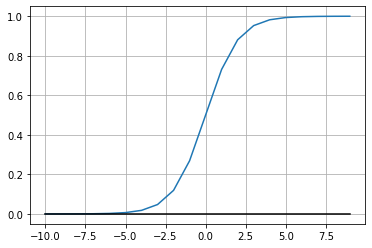

In [8]:
plt.plot(X,sigmoid(X))
plt.plot(X,[0 for i in X],c='black')
plt.grid()
plt.show()

2. Tanh

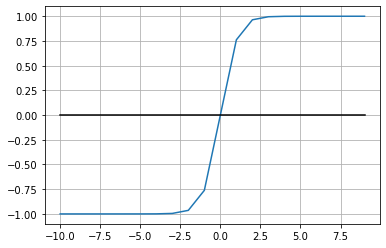

In [9]:
plt.plot(X,tanh(X))
plt.plot(X,[0 for i in X],c='black')
plt.grid()
plt.show()

ReLU

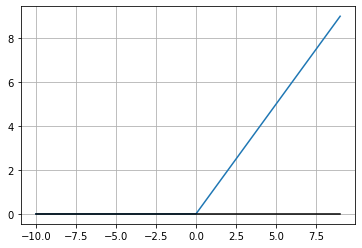

In [10]:
plt.plot(X,[ReLU(i) for i in X])
plt.plot(X,[0 for i in X],c='black')
plt.grid()
plt.show()

Leaky ReLU

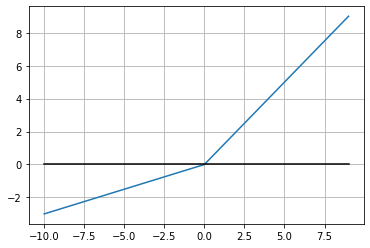

In [11]:
plt.plot(X,[Leaky_ReLU(0.3,i) for i in X])
plt.plot(X,[0 for i in X],c='black')
plt.grid()
plt.show()

ELU

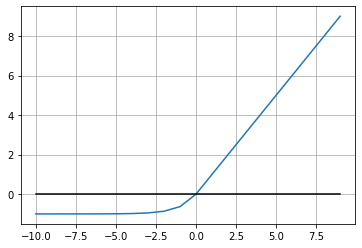

In [12]:
plt.plot(X,[ELU(1,i) for i in X])
plt.plot(X,[0 for i in X],c='black')
plt.grid()
plt.show()

SELU

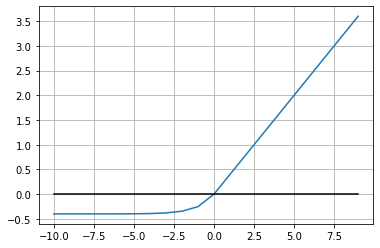

In [13]:
plt.plot(X,[0.4*ELU(1,i) for i in X])
plt.plot(X,[0 for i in X],c='black')
plt.grid()
plt.show()

# Batch Normalization

In [14]:
fashion_mnist = keras.datasets.fashion_mnist

In [15]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [16]:
# creating validation sets
X_valid = X_train[:5000]
X_train = X_train[5000:]
y_valid = y_train[:5000]
y_train = y_train[5000:]

In [17]:
model = keras.models.Sequential()

In [18]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

In [19]:
model.add(keras.layers.BatchNormalization())

In [20]:
model.add(keras.layers.Dense(units=300,activation='elu',kernel_initializer='he_normal'))

In [21]:
model.add(keras.layers.BatchNormalization())

In [22]:
model.add(keras.layers.Dense(units=100,activation='elu',kernel_initializer='he_normal'))

In [23]:
model.add(keras.layers.BatchNormalization())

In [24]:
model.add(keras.layers.Dense(units=10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [32]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid))

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1266 - accuracy: 0.9534 - val_loss: 0.3927 - val_accuracy: 0.8924
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1264 - accuracy: 0.9530 - val_loss: 0.4737 - val_accuracy: 0.8914
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1215 - accuracy: 0.9559 - val_loss: 0.5841 - val_accuracy: 0.8930
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1196 - accuracy: 0.9563 - val_loss: 0.5456 - val_accuracy: 0.8900
Epoch 5/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1176 - accuracy: 0.9571 - val_loss: 0.4790 - val_accuracy: 0.8958
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1162 - accuracy: 0.9574 - val_loss: 0.4847 - val_accuracy: 0.8932
Epoch 7/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1147 - accuracy: 0.9575 - val_loss: 0.4175 - val_ac

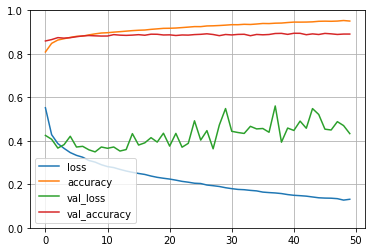

In [30]:
pd.DataFrame(history.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8861


[0.4154689311981201, 0.8860999941825867]